In [1]:
import sys
sys.path.append('/project2/alvinjin_1630/results')

from Trainer import Trainer

/project2/alvinjin_1630


In [2]:
import jax

trainer = Trainer(
    dataset='D1',
    hidden_dims=[30] * 8,
    act_fn=lambda x: jax.nn.leaky_relu(x, negative_slope=0.2),
    study_name='30x8_leaky',
    residual=False
)

# mrds = trainer.get_mrd_list(include_ids=True)
# sorted_mrds = sorted(mrds, key=lambda x: x[1])
# sorted_mrds

In [3]:
recons = trainer.invert_output(
    target_label=0,
    model_ids=[2],
    num_samples=10000,
    save=False
)

  0%|          | 0/1 [00:00<?, ?it/s]/home1/adshaw/.local/lib/python3.13/site-packages/equinox/nn/_normalisation.py:92: UserWarning: LayerNorm(elementwise_affine=...) is deprecated in favour of LayerNorm(use_weight=...) and LayerNorm(use_bias=...)
  warnings.warn(
100%|██████████| 1/1 [00:06<00:00,  6.15s/it]


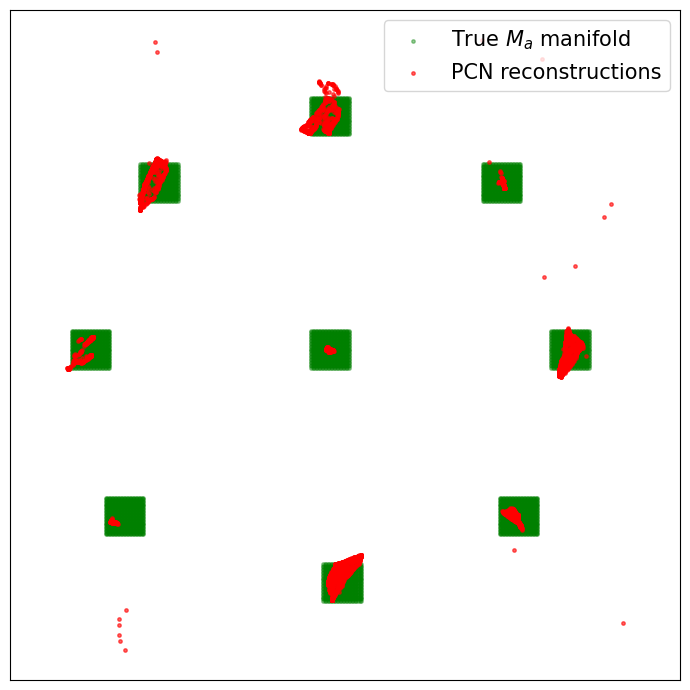

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import jax

# -------------------------------
# 2. Get true D-I dataset (green manifold)
# -------------------------------
X_true = Trainer.all_green[0]   # shape (N, 2)

X_recon = recons[2]

# -------------------------------
# 4. Plot overlay
# -------------------------------
plt.figure(figsize=(7, 7))

plt.scatter(
    X_true[:, 0], X_true[:, 1],
    s=6, color='green', alpha=0.4,
    label=r'True $M_a$ manifold'
)

plt.scatter(
    X_recon[:, 0], X_recon[:, 1],
    s=6, color='red', alpha=0.6,
    label='PCN reconstructions'
)

plt.xticks([])
plt.yticks([])

plt.axis('equal')
plt.legend(fontsize=15, loc="upper right")
plt.tight_layout()

plt.savefig('/project2/alvinjin_1630/results/D1/figures/reconstructions/30x8_leaky_model_2.png', dpi=300)

plt.show()

In [ ]:
# import numpy as np
# print(len(trainer.get_mrd_list()))
# print(np.mean(trainer.get_mrd_list()))

In [ ]:
data = Trainer.get_bootstrap_data(data_filename='all_8_layer_models_all_stats_mean_alpha0.05', studies=['.*x8', r'30x4.*x4'])

# Trainer.get_tsc(
#     data=data,
#     to_calculate=['30x8_tanh', '30x8_relu', '30x8_leaky', '30x4_24x4_relu', '30x4_24x4_leaky', '24x8_relu', '18x8_relu'],
#     title='Title',
#     legend_title='Architecture',
#     plot=True
# )

Trainer.plot_mrd_tss(data=data, print_all=True, print_outliers=True)